In [1]:
import pandas as pd
import math
import numpy as np

from tqdm import tqdm
import math
import numpy
import matplotlib.pyplot as plt
import random
import numpy as np

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 80)

In [2]:
data1 = pd.read_csv('outputs4/backtest_output_avellaneda.csv')
data1['strategy'] = 'Avellaneda'

data2 = pd.read_csv('outputs4/backtest_output_ho_and_stoll.csv')
data2['strategy'] = 'Ho_Stoll'

data3 = pd.read_csv('outputs4/backtest_output_ML.csv')
data3['strategy'] = 'ML'

data_latency_df = pd.concat([data1, data2, data3])

data_df = data_latency_df[data_latency_df['latency'] == 0].copy()
data_df

,Unnamed: 0,ticker,latency,start_ts,eod_position,eod_cash,net_pnl,trading_pnl,avg_size,avg_size_square,trading_volume,volatility,net_return,utility,strategy
0,0,AMZN,0,2023-05-15 14:00:00,42,-4695.93,-46.65,60.515,19.477601,700.375522,3768,0.042363,0.295,1.788117,Avellaneda
1,1,AMZN,0,2023-05-15 14:30:00,18,-1998.70,14.19,59.365,16.713377,573.057134,3496,0.033384,-0.070,3.638142,Avellaneda
2,2,AMZN,0,2023-05-15 15:00:00,-25,2654.82,-85.47,33.910,14.718745,422.517976,2271,0.024774,-0.670,-0.963240,Avellaneda
3,3,AMZN,0,2023-05-15 15:30:00,-22,2426.82,18.97,39.460,16.381142,523.276166,2282,0.024531,0.060,4.060352,Avellaneda
4,4,AMZN,0,2023-05-15 16:00:00,152,-16823.23,-86.05,24.460,10.880474,387.175248,1186,0.019413,0.490,-3.457146,Avellaneda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,AMZN,0,2023-05-19 17:30:00,-85,9890.91,25.22,30.855,9.269537,253.688195,1641,0.020022,0.280,5.142786,ML
416,416,AMZN,0,2023-05-19 18:00:00,-16,1849.24,9.04,27.905,3.596812,27.946683,1356,0.022116,0.400,4.761839,ML
417,417,AMZN,0,2023-05-19 18:30:00,-72,8348.65,-2.75,11.660,1.673212,4.627097,636,0.018249,-0.230,3.227001,ML
418,418,AMZN,0,2023-05-19 19:00:00,-42,4871.63,8.84,11.880,7.094153,59.597341,648,0.015601,0.150,4.938893,ML


In [23]:
def latex_printer(mean_df, std_df, columns):    
    for index in range(len(mean_df)):
        m_row = mean_df.loc[index]
        s = m_row['strategy'].replace('_', '\\_')
        out_str = f"{s} &"
        for col in columns:
            if col in ['trading_volume', 'latency']:
                out_str += f" {m_row[col] :.0f} &"
            elif col in ['ticker', 'opening_hours', 'Volatility']:
                out_str += f" {m_row[col]} &"    
            else:
                out_str += f" {m_row[col] :.2f} &"    
        print(out_str[:-1] + '\\\\')

        s_row = std_df.loc[index]
        out_str = "     &"
        for col in columns:
            if col in ['trading_volume']:
                out_str += f" ({s_row[col] :.0f}) &"
            elif col in ['ticker', 'opening_hours', 'Volatility', 'latency']:
                out_str += f"     &"
            else:
                out_str += f" ({s_row[col]/ np.sqrt(180) :.2f}) &"    
        print(out_str[:-1] + '\\\\')

In [24]:
## Summary Performance
columns = ['net_pnl', 'trading_pnl', 'avg_size', 'trading_volume', 'utility']
mean_df = data_df.groupby(['strategy', 'latency'])[columns].mean().reset_index()    
std_df = data_df.groupby(['strategy', 'latency'])[columns].std().reset_index()
latex_printer(mean_df, std_df, columns)

Avellaneda & 19.00 & 81.44 & 8.41 & 3207 & 5.44 \\
     & (3.96) & (6.06) & (0.36) & (2498) & (0.21) \\
Ho\_Stoll & 23.22 & 112.54 & 8.41 & 4698 & 5.06 \\
     & (4.62) & (7.81) & (0.34) & (3325) & (0.12) \\
ML & 21.89 & 81.54 & 5.40 & 2832 & 6.23 \\
     & (4.88) & (6.51) & (0.22) & (2332) & (0.17) \\


In [5]:
## Summary Opening Hours
data_df['opening_hours'] = pd.to_datetime(data_df['start_ts']).dt.hour <= 14
mean_df = data_df.groupby(['strategy', 'latency', 'opening_hours'])[columns].mean().reset_index()
std_df = data_df.groupby(['strategy', 'latency', 'opening_hours'])[columns].std().reset_index()
latex_printer(mean_df, std_df, ['opening_hours'] + columns)

Avellaneda & False & 19.37 & 76.50 & 8.43 & 2982 & 5.50 \\
     &     & (50.45) & (78.40) & (4.80) & (2344) & (2.95) \\
Avellaneda & True & 17.16 & 106.15 & 8.32 & 4328 & 5.18 \\
     &     & (65.81) & (92.10) & (4.97) & (2954) & (1.87) \\
Ho\_Stoll & False & 24.60 & 105.01 & 8.49 & 4363 & 5.12 \\
     &     & (51.86) & (99.82) & (4.67) & (3098) & (1.59) \\
Ho\_Stoll & True & 16.36 & 150.21 & 7.97 & 6376 & 4.75 \\
     &     & (99.42) & (121.87) & (4.14) & (3928) & (1.29) \\
ML & False & 20.98 & 77.09 & 5.53 & 2631 & 6.27 \\
     &     & (64.57) & (86.75) & (3.07) & (2222) & (2.35) \\
ML & True & 26.44 & 103.81 & 4.71 & 3840 & 6.02 \\
     &     & (71.17) & (88.38) & (1.69) & (2633) & (1.85) \\


In [6]:
## Summary Volatility
data_df['Volatility'] = np.where(data_df['volatility'] <= data_df['volatility'].median(), 'Low', 'High')
mean_df = data_df.groupby(['strategy', 'latency', 'Volatility'])[columns].mean().reset_index()
std_df = data_df.groupby(['strategy', 'latency', 'Volatility'])[columns].std().reset_index()
latex_printer(mean_df, std_df, ['Volatility'] + columns)

Avellaneda & High & 23.64 & 122.54 & 5.04 & 4229 & 6.24 \\
     &     & (63.29) & (96.64) & (1.89) & (2940) & (2.08) \\
Avellaneda & Low & 14.36 & 40.34 & 11.78 & 2185 & 4.65 \\
     &     & (40.30) & (23.35) & (4.48) & (1338) & (3.17) \\
Ho\_Stoll & High & 22.38 & 165.79 & 5.16 & 5979 & 5.81 \\
     &     & (84.19) & (124.30) & (2.03) & (3942) & (1.39) \\
Ho\_Stoll & Low & 24.06 & 59.30 & 11.65 & 3417 & 4.30 \\
     &     & (25.57) & (30.17) & (4.09) & (1838) & (1.31) \\
ML & High & 19.53 & 119.89 & 4.42 & 3647 & 6.97 \\
     &     & (89.63) & (106.94) & (1.29) & (2757) & (2.26) \\
ML & Low & 24.25 & 43.19 & 6.37 & 2017 & 5.49 \\
     &     & (24.35) & (30.60) & (3.64) & (1410) & (2.05) \\


In [7]:
## Summary Ticker
columns = ['net_pnl', 'trading_pnl', 'avg_size', 'trading_volume', 'utility']
mean_df = data_df.groupby(['strategy', 'ticker', 'latency'])[columns].mean().sort_values('ticker').reset_index()
std_df = data_df.groupby(['strategy', 'ticker', 'latency'])[columns].std().sort_values('ticker').reset_index()
latex_printer(mean_df, std_df, ['ticker'] + columns)

Avellaneda & AMZN & 15.53 & 51.88 & 14.15 & 3060 & 3.54 \\
     &     & (45.79) & (20.04) & (2.85) & (1050) & (1.72) \\
Ho\_Stoll & AMZN & 27.14 & 74.99 & 14.12 & 4607 & 3.72 \\
     &     & (22.74) & (28.01) & (2.63) & (1616) & (0.53) \\
ML & AMZN & 27.49 & 53.34 & 6.17 & 2666 & 4.79 \\
     &     & (26.43) & (35.67) & (4.25) & (1678) & (1.61) \\
Avellaneda & MSFT & 14.09 & 34.42 & 6.91 & 1202 & 6.56 \\
     &     & (31.05) & (29.99) & (2.80) & (910) & (3.63) \\
Ho\_Stoll & MSFT & 18.75 & 53.41 & 7.02 & 2188 & 5.48 \\
     &     & (27.35) & (38.09) & (1.48) & (1258) & (1.71) \\
ML & MSFT & 17.82 & 51.30 & 6.31 & 1761 & 6.57 \\
     &     & (32.79) & (44.87) & (1.63) & (1210) & (2.32) \\
Avellaneda & NVDA & 27.37 & 158.01 & 4.18 & 5358 & 6.23 \\
     &     & (73.41) & (98.30) & (0.67) & (2860) & (1.39) \\
Ho\_Stoll & NVDA & 23.78 & 209.23 & 4.08 & 7300 & 5.97 \\
     &     & (101.87) & (128.83) & (0.61) & (4006) & (1.11) \\
ML & NVDA & 20.36 & 139.98 & 3.72 & 4071 & 7.33 \\
     &     

In [8]:
## Summary Latency
columns = ['net_pnl', 'trading_pnl', 'avg_size', 'trading_volume', 'utility']
mean_df = data_latency_df.groupby(['strategy', 'latency'])[columns].mean().reset_index()
std_df = data_latency_df.groupby(['strategy', 'latency'])[columns].std().reset_index() / np.sqrt(60)
latex_printer(mean_df, std_df, ['latency'] + columns)

Avellaneda & 0 & 19.00 & 81.44 & 8.41 & 3207 & 5.44 \\
     &     & (53.11) & (81.32) & (4.82) & (2498) & (2.79) \\
Avellaneda & 5 & 14.78 & 74.89 & 7.35 & 3601 & 4.43 \\
     &     & (60.14) & (56.45) & (3.76) & (2144) & (1.98) \\
Avellaneda & 10 & 13.97 & 73.23 & 7.22 & 3602 & 4.29 \\
     &     & (53.20) & (53.84) & (3.90) & (2091) & (1.74) \\
Ho\_Stoll & 0 & 23.22 & 112.54 & 8.41 & 4698 & 5.06 \\
     &     & (62.05) & (104.81) & (4.58) & (3325) & (1.55) \\
Ho\_Stoll & 5 & 28.23 & 95.12 & 7.18 & 4706 & 4.52 \\
     &     & (59.36) & (68.73) & (3.79) & (2652) & (1.52) \\
Ho\_Stoll & 10 & 24.36 & 93.46 & 7.12 & 4718 & 4.36 \\
     &     & (72.67) & (64.87) & (3.64) & (2584) & (1.46) \\
ML & 0 & 21.89 & 81.54 & 5.40 & 2832 & 6.23 \\
     &     & (65.54) & (87.35) & (2.90) & (2332) & (2.27) \\
ML & 5 & 20.11 & 69.81 & 5.42 & 3255 & 4.78 \\
     &     & (60.83) & (54.14) & (2.80) & (1864) & (1.81) \\
ML & 10 & 14.59 & 69.83 & 5.36 & 3314 & 4.51 \\
     &     & (74.12) & (53.28) & (2.67)

In [9]:
## Summary Latency Opening Hours

data_latency_df['opening_hours'] = pd.to_datetime(data_latency_df['start_ts']).dt.hour <= 14
columns = ['net_pnl', 'trading_pnl', 'avg_size', 'trading_volume', 'utility']
mean_df = data_latency_df.groupby(['strategy', 'opening_hours', 'latency'])[columns].mean().sort_values(['strategy', 'latency']).reset_index()
std_df = data_latency_df.groupby(['strategy', 'opening_hours', 'latency'])[columns].std().sort_values(['strategy', 'latency']).reset_index()
latex_printer(mean_df, std_df, ['latency', 'opening_hours'] + columns)

Avellaneda & 0 & False & 19.37 & 76.50 & 8.43 & 2982 & 5.50 \\
     &     &     & (50.45) & (78.40) & (4.80) & (2344) & (2.95) \\
Avellaneda & 0 & True & 17.16 & 106.15 & 8.32 & 4328 & 5.18 \\
     &     &     & (65.81) & (92.10) & (4.97) & (2954) & (1.87) \\
Avellaneda & 5 & False & 17.78 & 68.79 & 7.41 & 3316 & 4.54 \\
     &     &     & (53.44) & (52.36) & (3.79) & (1981) & (2.04) \\
Avellaneda & 5 & True & -0.23 & 105.37 & 7.05 & 5025 & 3.83 \\
     &     &     & (85.85) & (66.53) & (3.67) & (2385) & (1.60) \\
Avellaneda & 10 & False & 15.24 & 67.11 & 7.26 & 3317 & 4.36 \\
     &     &     & (49.59) & (49.65) & (3.96) & (1925) & (1.75) \\
Avellaneda & 10 & True & 7.63 & 103.83 & 7.00 & 5026 & 3.93 \\
     &     &     & (69.13) & (63.74) & (3.63) & (2333) & (1.72) \\
Ho\_Stoll & 0 & False & 24.60 & 105.01 & 8.49 & 4363 & 5.12 \\
     &     &     & (51.86) & (99.82) & (4.67) & (3098) & (1.59) \\
Ho\_Stoll & 0 & True & 16.36 & 150.21 & 7.97 & 6376 & 4.75 \\
     &     &     & (99.42) 

# Return Markouts

In [25]:
import databento as db

def databento_file_parser(file_path):

    stored_data = db.DBNStore.from_file(file_path)

    # Convert to dataframe
    df = stored_data.to_df()
    df = df[df.publisher_id == 2]
    del df['publisher_id']
    del df['rtype']
    del df['ts_in_delta']
    del df['instrument_id']
    del df['sequence']

    for i in range(10):
        del df[f'bid_ct_{i:02.0f}']
        del df[f'ask_ct_{i:02.0f}']

    df.index = df.index.tz_localize(None)
    df['ts_event'] = df['ts_event'].dt.tz_localize(None)

    open_ts = pd.to_datetime(str(df.ts_event.iloc[0].date()) + ' 14:00:00')
    df = df[df['ts_event'] > open_ts]

    close_ts = pd.to_datetime(str(df.ts_event.iloc[0].date()) + ' 20:00:00')
    df = df[df['ts_event'] < close_ts]

    return df

In [26]:
from itertools import product

TICKERS = ['MSFT', 'AMZN', 'NVDA']
TEST_DATES = ['20230515', '20230516', '20230517', '20230518', '20230519']
TEST_SAMPLE = list(product(TICKERS, TEST_DATES))

mid_price_df = {t: [] for t in TICKERS}
m_df = []

for ticker, date in TEST_SAMPLE:
    data_file_path = f'../data/databento/{ticker}/xnas-itch-{date}.mbp-10.dbn.zst'
    tick_data_df = databento_file_parser(data_file_path)
    print(ticker, date)
    m_df.append((ticker, date, len(tick_data_df), len(tick_data_df[tick_data_df['action'] == 'T'])))
    midprice = tick_data_df[['bid_px_00', 'ask_px_00']].mean(axis=1)
    mid_price_df[ticker].append(midprice)
    del tick_data_df

for t in TICKERS:
    mid_price_df[t] = pd.concat(mid_price_df[t])
    mid_price_df[t].name = 'mid_price'

MSFT 20230515
MSFT 20230516
MSFT 20230517
MSFT 20230518
MSFT 20230519
AMZN 20230515
AMZN 20230516
AMZN 20230517
AMZN 20230518
AMZN 20230519
NVDA 20230515
NVDA 20230516
NVDA 20230517
NVDA 20230518
NVDA 20230519


In [27]:
pd.DataFrame(m_df).groupby(0)[[2, 3]].mean()

,2,3
0,,
AMZN,1812850.0,69297.0
MSFT,1500666.0,73952.6
NVDA,1173401.2,107474.8


In [28]:
trade_tables = {}

trade_df1 = pd.read_csv('outputs4/backtest_output_avellaneda_trades.csv')
trade_df1['ts'] = pd.to_datetime(trade_df1['ts'])
trade_df1 = trade_df1.set_index('ts').sort_index()
trade_df1
trade_tables['Avellaneda'] = trade_df1

# trade_df1
trade_df2 = pd.read_csv('outputs4/backtest_output_ho_and_stoll_trades.csv')
trade_df2['ts'] = pd.to_datetime(trade_df2['ts'])
trade_df2 = trade_df2.set_index('ts').sort_index()
trade_df2
trade_tables['Ho_Stoll'] = trade_df2

trade_df3 = pd.read_csv('outputs4/backtest_output_ML_trades.csv')
trade_df3['ts'] = pd.to_datetime(trade_df3['ts'])
trade_df3 = trade_df3.set_index('ts').sort_index()
trade_df3
trade_tables['ML'] = trade_df3
trade_df3

,Unnamed: 0,price,size,midprice,ticker,latency,start_ts
ts,,,,,,,
2023-05-15 14:00:00.016263328,0,110.03,-34,110.025,AMZN,5,2023-05-15 14:00:00
2023-05-15 14:00:00.031592118,0,110.04,-10,110.035,AMZN,0,2023-05-15 14:00:00
2023-05-15 14:00:00.031592118,1,110.04,-10,110.035,AMZN,5,2023-05-15 14:00:00
2023-05-15 14:00:00.031592118,0,110.04,-10,110.035,AMZN,10,2023-05-15 14:00:00
2023-05-15 14:00:00.123559365,0,308.83,-6,308.810,MSFT,10,2023-05-15 14:00:00
...,...,...,...,...,...,...,...
2023-05-19 19:59:59.903480483,600,318.36,-32,318.330,MSFT,0,2023-05-19 19:30:00
2023-05-19 19:59:59.903619175,601,318.36,-12,318.330,MSFT,0,2023-05-19 19:30:00
2023-05-19 19:59:59.903619175,602,318.36,-4,318.330,MSFT,0,2023-05-19 19:30:00


In [29]:
def create_markouts(trade_df, mid_price_df):

    ts_delta_milli = [0, 1, 2, 3, 4, 5, 10, 20, 50]
    returns = []

    for delta in ts_delta_milli:
        trade_df['ts_lag'] = trade_df.index +  pd.Timedelta(milliseconds=delta)
        lag_price = pd.merge_asof(trade_df, mid_price_df, left_on = 'ts_lag', right_index=True, direction='forward')['mid_price']    
        ret = (lag_price - trade_df['price']) / lag_price * 1e4 * np.sign(trade_df['size'])

        returns.append((delta, ret.mean(), ret.std()))

    return pd.DataFrame(returns, columns=['lag', 'return', 'std'])

In [30]:
# By Latency

tbls = []
for strategy in trade_tables:
    trades = trade_tables[strategy]    
    for ticker in trades['ticker'].unique():
        for latency in trades['latency'].unique():
            t_df = trades[(trades['latency'] == latency) & (trades['ticker'] == ticker)]
            markouts_df1 = create_markouts(t_df.copy(), mid_price_df[ticker])
            markouts_df1['strategy'] = strategy
            markouts_df1['latency'] = latency
            markouts_df1['ticker'] = ticker
            tbls.append(markouts_df1)

markouts_df = pd.concat(tbls)
print(markouts_df)

    lag    return       std    strategy  latency ticker
0     0  0.323405  0.298298  Avellaneda        5   MSFT
1     1  0.049508  0.328894  Avellaneda        5   MSFT
2     2  0.032865  0.356826  Avellaneda        5   MSFT
3     3  0.021862  0.370412  Avellaneda        5   MSFT
4     4  0.016153  0.389859  Avellaneda        5   MSFT
..  ...       ...       ...         ...      ...    ...
4     4  0.095334  0.544099          ML       10   NVDA
5     5  0.093351  0.555478          ML       10   NVDA
6    10  0.065736  0.591497          ML       10   NVDA
7    20  0.033481  0.868490          ML       10   NVDA
8    50 -0.020004  1.025204          ML       10   NVDA

[243 rows x 6 columns]


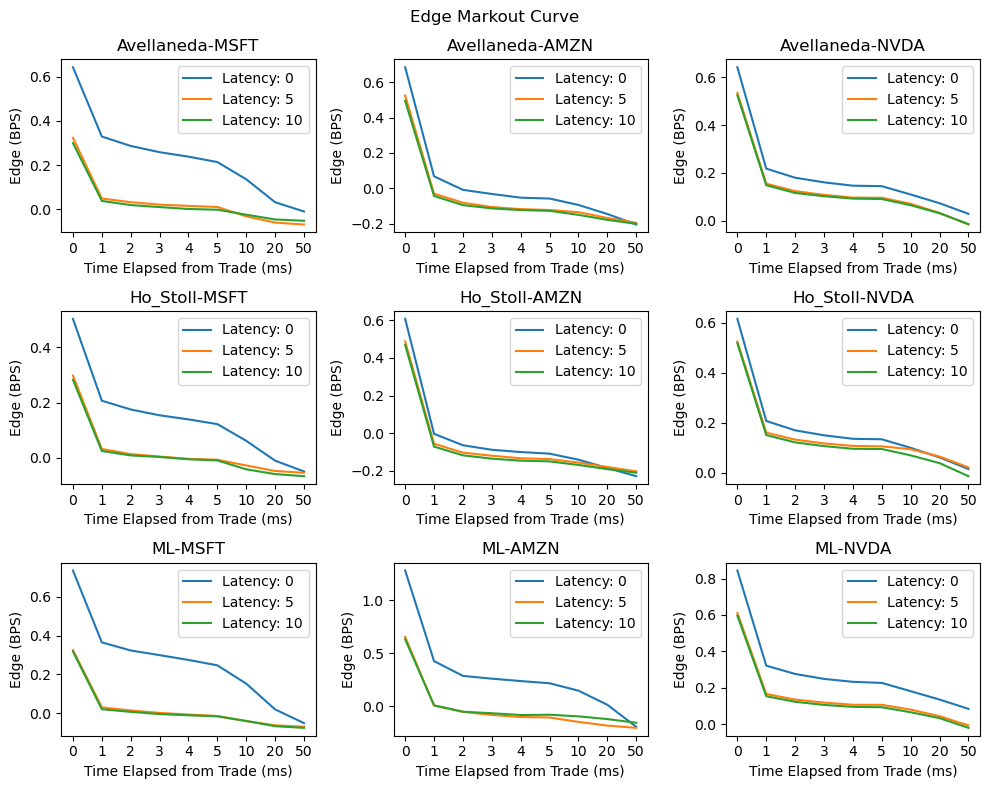

In [31]:
strategies = markouts_df['strategy'].unique()
tickers = markouts_df['ticker'].unique()

fig, axs = plt.subplots(len(strategies), len(tickers), figsize=(10, 8))

# Create subplots for each strategy
for i, strategy in enumerate(strategies):
    # Filter data for the current strategy    
    for j, ticker in enumerate(tickers):
        strategy_data = markouts_df[(markouts_df['strategy'] == strategy) & (markouts_df['ticker'] == ticker)]

        axs[i, j].set_title(f"{strategy}-{ticker}")
        axs[i, j].set_xlabel('Time Elapsed from Trade (ms)')
        axs[i, j].set_ylabel('Edge (BPS)')

        # Plot separate lines for each latency
        latencies = strategy_data['latency'].unique()
        latencies.sort()

        for latency in latencies:
            latency_data = strategy_data[(strategy_data['latency'] == latency)]
            axs[i, j].plot(latency_data['lag'].astype(str), latency_data['return'], label=f"Latency: {latency}")
        axs[i, j].legend()

fig.suptitle('Edge Markout Curve')
fig.tight_layout()

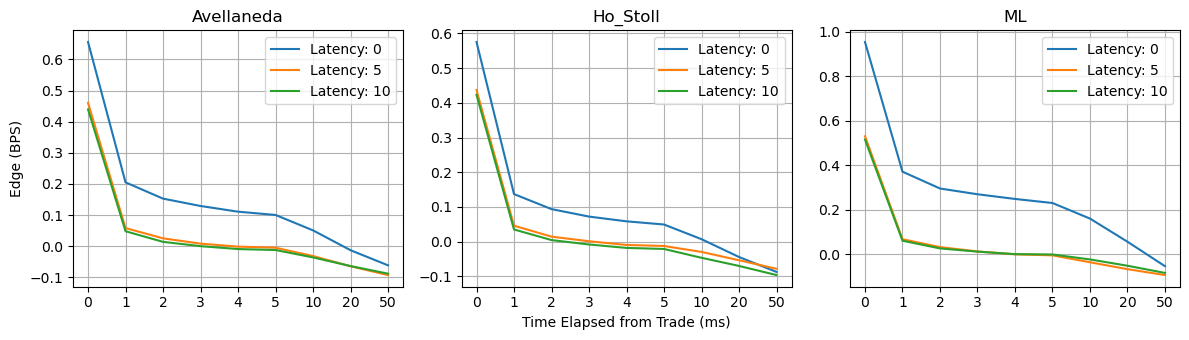

In [53]:
strategies = markouts_df['strategy'].unique()
tickers = markouts_df['ticker'].unique()

fig, axs = plt.subplots(1, len(strategies), figsize=(12, 3.5))

# Create subplots for each strategy
for i, strategy in enumerate(strategies):
    # Filter data for the current strategy    
    strategy_data = markouts_df[(markouts_df['strategy'] == strategy)]
    strategy_data = strategy_data.groupby(['strategy', 'lag', 'latency'])['return'].mean().reset_index()

    axs[i].set_title(f"{strategy}")
    # axs[i].set_xlabel('Time Elapsed from Trade (ms)')
    # axs[i].set_ylabel('Edge (BPS)')

    # Plot separate lines for each latency
    latencies = strategy_data['latency'].unique()
    latencies.sort()

    for latency in latencies:
        latency_data = strategy_data[(strategy_data['latency'] == latency)]
        axs[i].plot(latency_data['lag'].astype(str), latency_data['return'], label=f"Latency: {latency}")
    axs[i].legend()
    axs[i].grid(True)

axs[1].set_xlabel('Time Elapsed from Trade (ms)')
axs[0].set_ylabel('Edge (BPS)')

# fig.suptitle('Edge Markout Curve')
fig.tight_layout()

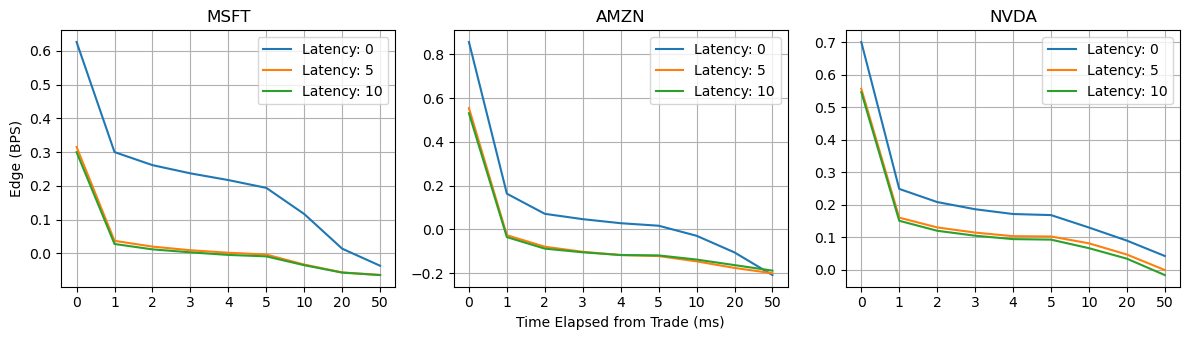

In [54]:
strategies = markouts_df['strategy'].unique()
tickers = markouts_df['ticker'].unique()

fig, axs = plt.subplots(1, len(strategies), figsize=(12, 3.5))

# Create subplots for each strategy
for i, ticker in enumerate(tickers):
    # Filter data for the current strategy    
    strategy_data = markouts_df[(markouts_df['ticker'] == ticker)]
    strategy_data = strategy_data.groupby(['ticker', 'lag', 'latency'])['return'].mean().reset_index()

    axs[i].set_title(f"{ticker}")
    # axs[i].set_xlabel('Time Elapsed from Trade (ms)')
    # axs[i].set_ylabel('Edge (BPS)')

    # Plot separate lines for each latency
    latencies = strategy_data['latency'].unique()
    latencies.sort()

    for latency in latencies:
        latency_data = strategy_data[(strategy_data['latency'] == latency)]
        axs[i].plot(latency_data['lag'].astype(str), latency_data['return'], label=f"Latency: {latency}")
    axs[i].legend()
    axs[i].grid(True)

axs[1].set_xlabel('Time Elapsed from Trade (ms)')
axs[0].set_ylabel('Edge (BPS)')

# fig.suptitle('Edge Markout Curve')
fig.tight_layout()